# Regresión logística para predicciones bancarias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("/content/drive/MyDrive/Python Machine Learning JGG/datasets/bank/bank.csv", sep=";")

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
data.shape

(4119, 21)

In [6]:
data.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [ ]:
# la última columna indica si al final acabaron comprando el producto o no (yes, no)
# como el modelo no me puede decir sí o no, vamos a hacer una conversión a 0 y 1

In [7]:
data["y"]=(data["y"]=="yes").astype(int)

In [8]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [ ]:
# la variable educación también es categórica

In [9]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [ ]:
# nos salen 8 tipos diferentes de educación. habría que agruparlas

In [ ]:
# agrupamos las básicas

In [10]:
data["education"]=np.where(data["education"]=="basic.4y", "Basic", data["education"]) # esto quiere decir que: en la columna education de data buscamos en columna educación buscamos basic.4y y lo sustituimos por "Basic", y si no está, se mantiene lo que había
data["education"]=np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"]=np.where(data["education"]=="basic.9y", "Basic", data["education"])

# ahora vamos a cambiar el nombre a algunas para que queden más bonitas:
data["education"]=np.where(data["education"]=="high.school", "High School", data["education"])
data["education"]=np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"]=np.where(data["education"]=="university.degree", "University Degree", data["education"])
data["education"]=np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"]=np.where(data["education"]=="unknown", "Unknown", data["education"])

In [11]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [12]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [13]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [14]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [ ]:
# comparamos datos según NIVEL EDUCACIÓN

Text(0, 0.5, 'Frecuencia de compra del producto')

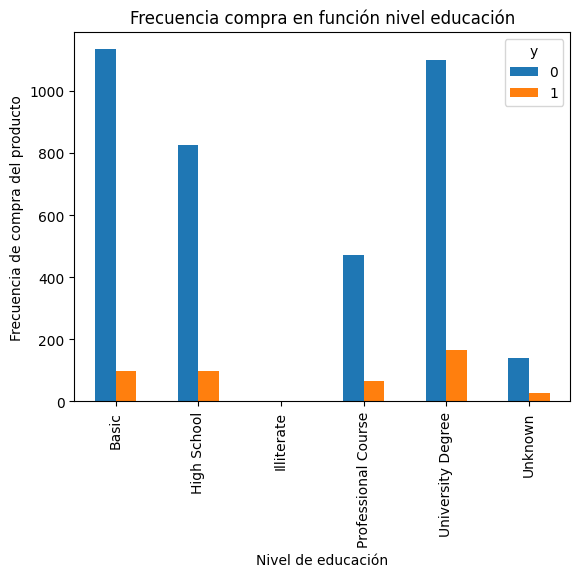

In [15]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind = "bar")
plt.title("Frecuencia compra en función nivel educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

In [ ]:
# observamos que, en proporción, el university degree compra más

In [ ]:
# comparamos datos según ESTADO CIVIL

Text(0, 0.5, 'Proporción de clientes')

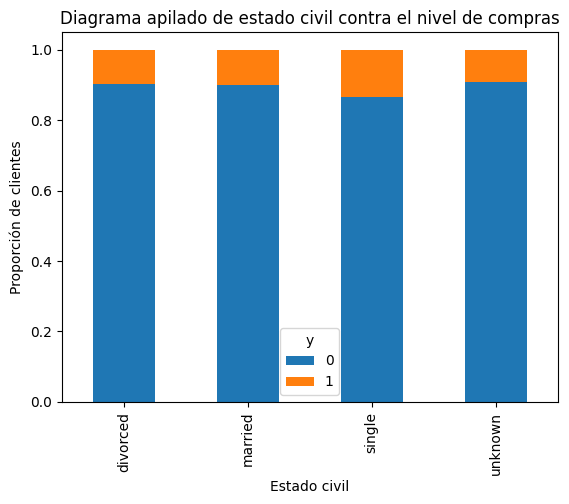

In [16]:
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True) # el 1 del sum() se refiere al axis 1 (por filas)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Proporción de clientes')

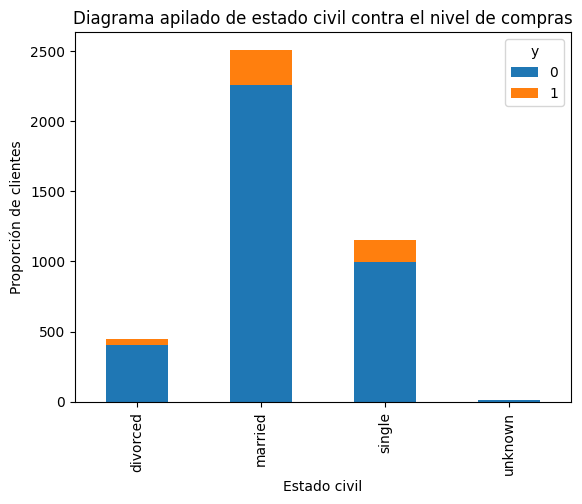

In [17]:
#### si lo hacemos como aquí abajo, no podemos comparar ya que las proporciones no son las mismas. es necesario hacer el table.div

table = pd.crosstab(data.marital,data.y)
table.plot(kind="bar", stacked=True) # el 1 del sum() se refiere al axis 1 (por filas)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

In [ ]:
# comparamos datos según DÍA DE LA SEMANA

Text(0, 0.5, 'Frecuencia de compra del producto')

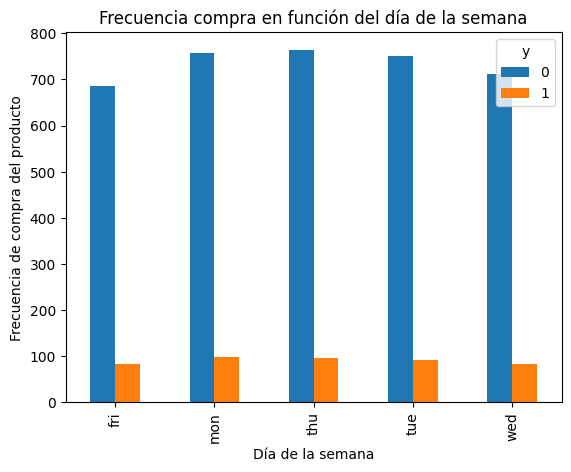

In [18]:
%matplotlib inline
pd.crosstab(data.day_of_week, data.y).plot(kind = "bar")
plt.title("Frecuencia compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

In [ ]:
# no hay ninguna influencia prácticamente

Text(0, 0.5, 'Proporción de clientes')

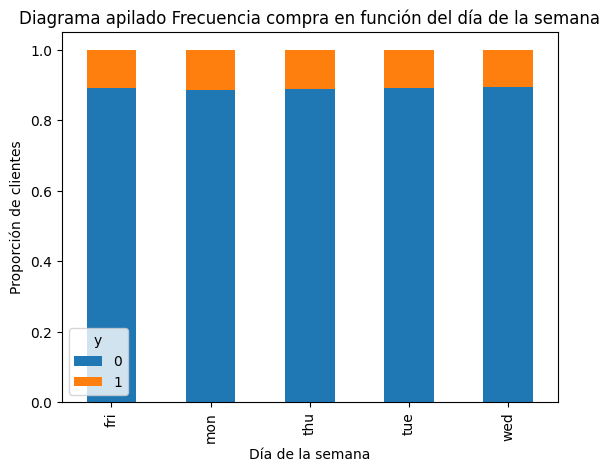

In [19]:
table = pd.crosstab(data.day_of_week,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True) # el 1 del sum() se refiere al axis 1 (por filas)
plt.title("Diagrama apilado Frecuencia compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Proporción de clientes")

In [ ]:
# no hay ninguna influencia prácticamente

In [ ]:
# comparamos datos según MES DE COMPRA

Text(0, 0.5, 'Frecuencia de compra del producto')

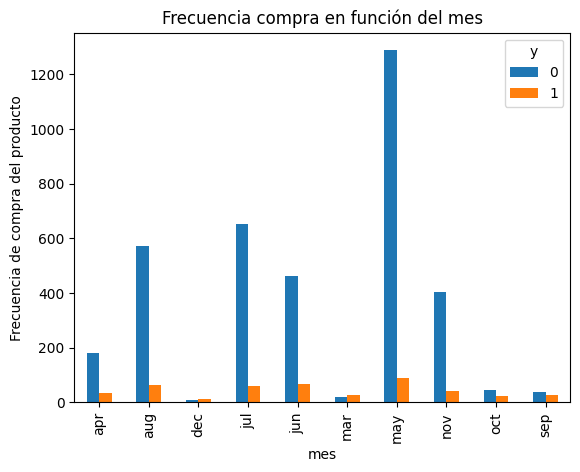

In [20]:
%matplotlib inline
pd.crosstab(data.month, data.y).plot(kind = "bar")
plt.title("Frecuencia compra en función del mes")
plt.xlabel("mes")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

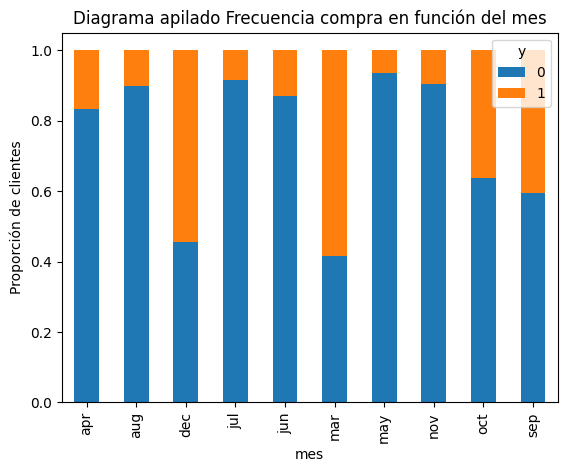

In [21]:
table = pd.crosstab(data.month,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True) # el 1 del sum() se refiere al axis 1 (por filas)
plt.title("Diagrama apilado Frecuencia compra en función del mes")
plt.xlabel("mes")
plt.ylabel("Proporción de clientes")

In [ ]:
# comparamos datos según EDAD

Text(0, 0.5, 'Frecuencia de compra del producto')

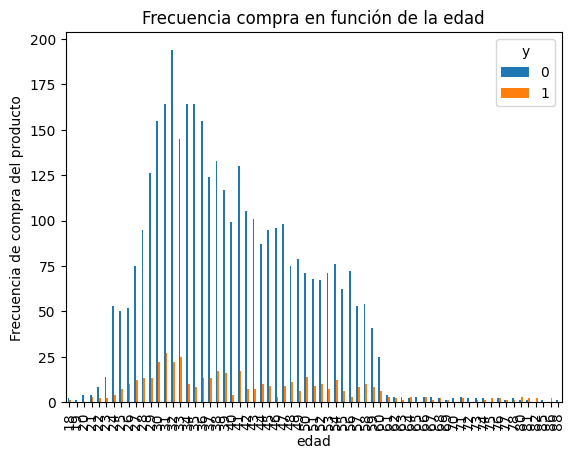

In [22]:
%matplotlib inline
pd.crosstab(data.age, data.y).plot(kind = "bar")
plt.title("Frecuencia compra en función de la edad")
plt.xlabel("edad")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

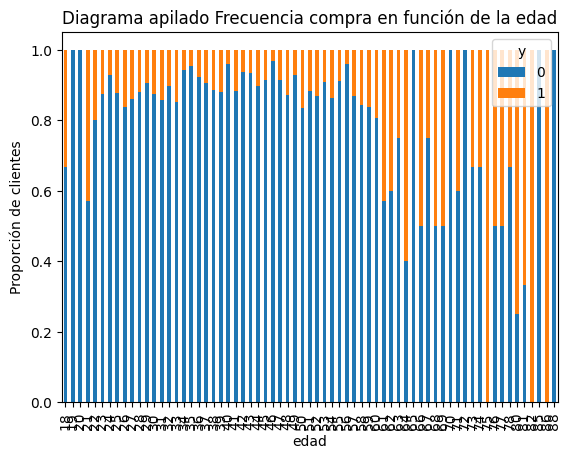

In [23]:
table = pd.crosstab(data.age,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True) # el 1 del sum() se refiere al axis 1 (por filas)
plt.title("Diagrama apilado Frecuencia compra en función de la edad")
plt.xlabel("edad")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Proporción de clientes')

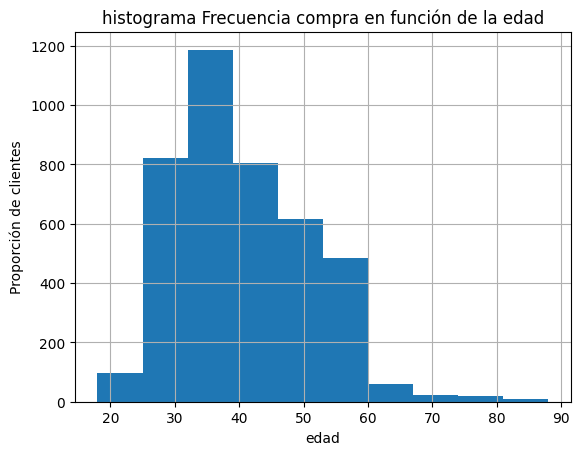

In [24]:
%matplotlib inline
data.age.hist()
plt.title("histograma Frecuencia compra en función de la edad")
plt.xlabel("edad")
plt.ylabel("Proporción de clientes")

In [25]:
pd.crosstab(data.poutcome, data.y)

y,0,1
poutcome,,
failure,387,67
nonexistent,3231,292
success,50,92


<Axes: xlabel='poutcome'>

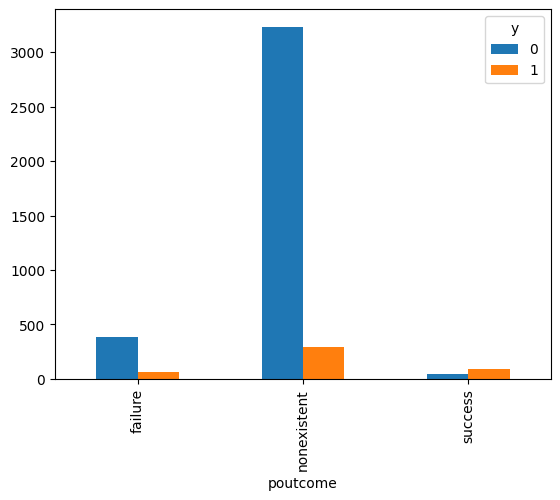

In [26]:
pd.crosstab(data.poutcome, data.y).plot(kind = "bar")

<Axes: xlabel='contact'>

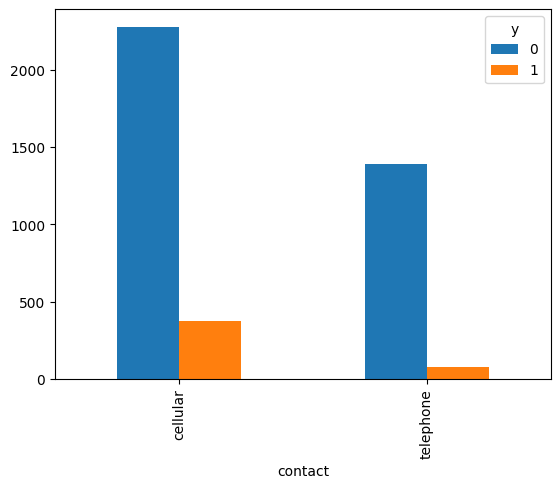

In [27]:
pd.crosstab(data.contact, data.y).plot(kind = "bar")

Text(0, 0.5, 'Proporción de clientes')

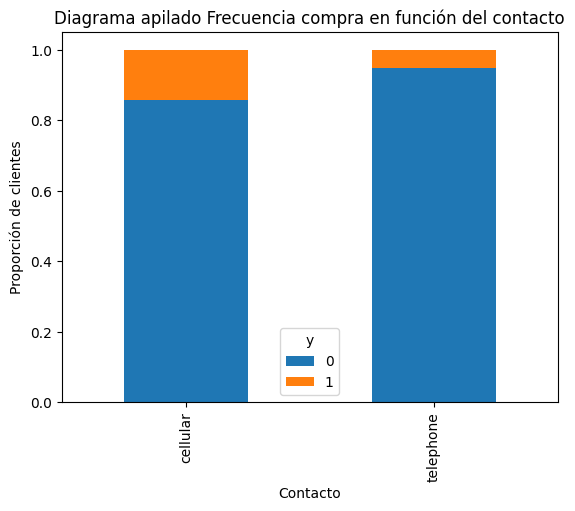

In [28]:
table = pd.crosstab(data.contact,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True) # el 1 del sum() se refiere al axis 1 (por filas)
plt.title("Diagrama apilado Frecuencia compra en función del contacto")
plt.xlabel("Contacto")
plt.ylabel("Proporción de clientes")

<Axes: xlabel='job'>

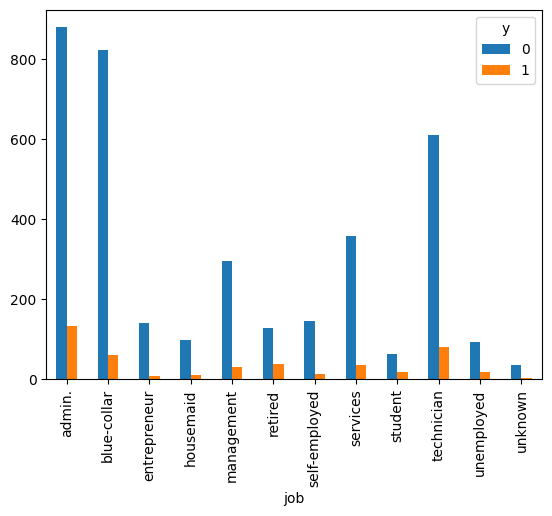

In [29]:
pd.crosstab(data.job, data.y).plot(kind = "bar")

Text(0, 0.5, 'Proporción de clientes')

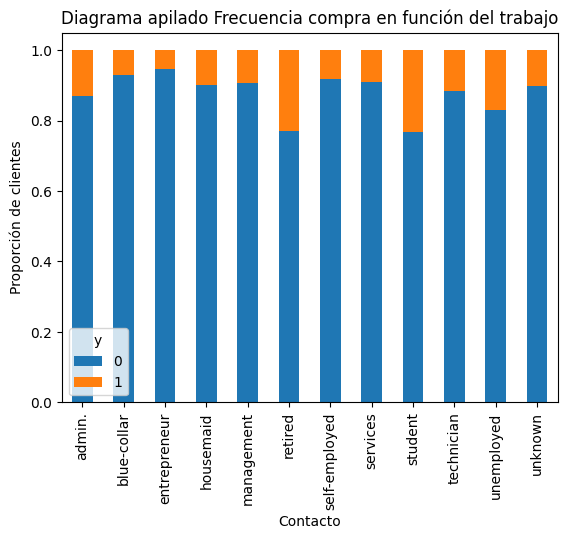

In [40]:
table = pd.crosstab(data.job,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True) # el 1 del sum() se refiere al axis 1 (por filas)
plt.title("Diagrama apilado Frecuencia compra en función del trabajo")
plt.xlabel("Contacto")
plt.ylabel("Proporción de clientes")

In [ ]:
# tenemos muchas variables categóricas y habría que pasarlas a dummy
# en vez de una a una, lo podemos hacer todas a la vez

### Conversión de las variables categóricas a dummies

In [101]:
data = pd.read_csv("/content/drive/MyDrive/Python Machine Learning JGG/datasets/bank/bank.csv", sep=";")

In [102]:
data["y"]=(data["y"]=="yes").astype(int)

In [103]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [104]:
categories = ["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0


In [105]:
data_vars = data.columns.values.tolist()
data_vars

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_m

In [106]:
# las categorias actuales ya no pintan nada, las elimino

to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [107]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week

In [108]:
bank_data_vars =bank_data.columns.values.tolist()
Y = ["y"]
X = [i for i in bank_data_vars if i not in Y]

### Selección de rasgos para el modelo

In [ ]:
# vamos a elegir qué variables son las más significativas para hacer el modelo.
# empezamos con 12 y luego podemos quitar o poner

In [109]:
n=12

In [110]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [111]:
lr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

In [112]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [114]:
print(rfe.support_) # nos dice cuáles se van a quedar dentro

[False False False False  True  True False False False False False False
 False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False  True False  True False False  True
  True  True False False False False False False False  True False  True]


In [115]:
print(rfe.ranking_) # nos dice cuáles son las más probables que se quedaran en el modelo

[35 46 20 49  1  1 10 31 43 40  9 25 17 39 16  1  1 23 22  7  8 45 14 48
 33  2 36 32 19 37 41 13 18 12 27  3 15 21  1 42  6 29  1 28  1 47  5  1
  1  1 30  4 34 44 26 38 11  1 24  1]


In [116]:
bank_data_vars

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_we

In [117]:
z=zip(bank_data_vars, rfe.support_, rfe.ranking_)

In [118]:
list(z)

[('age', False, 35),
 ('duration', False, 46),
 ('campaign', False, 20),
 ('pdays', False, 49),
 ('previous', True, 1),
 ('emp.var.rate', True, 1),
 ('cons.price.idx', False, 10),
 ('cons.conf.idx', False, 31),
 ('euribor3m', False, 43),
 ('nr.employed', False, 40),
 ('y', False, 9),
 ('job_admin.', False, 25),
 ('job_blue-collar', False, 17),
 ('job_entrepreneur', False, 39),
 ('job_housemaid', False, 16),
 ('job_management', True, 1),
 ('job_retired', True, 1),
 ('job_self-employed', False, 23),
 ('job_services', False, 22),
 ('job_student', False, 7),
 ('job_technician', False, 8),
 ('job_unemployed', False, 45),
 ('job_unknown', False, 14),
 ('marital_divorced', False, 48),
 ('marital_married', False, 33),
 ('marital_single', False, 2),
 ('marital_unknown', False, 36),
 ('education_basic.4y', False, 32),
 ('education_basic.6y', False, 19),
 ('education_basic.9y', False, 37),
 ('education_high.school', False, 41),
 ('education_illiterate', False, 13),
 ('education_professional.cours

In [ ]:
# creo el array con las columnas definitivas (true) #####ojo, en su ejemplo salen algunas columnas distintas a las mías

In [119]:
cols = ['previous','emp.var.rate','job_management','job_retired','loan_no','contact_telephone','month_aug','month_jun','month_mar','month_may','day_of_week_wed','poutcome_nonexistent']

In [134]:
X = bank_data[cols]
Y = bank_data["y"]

### Implementación del modelo en Python con statsmodel.api

In [135]:
import statsmodels.api as sm

In [138]:
logit_model = sm.Logit(Y,X) # aquí las variables no van en orden

In [137]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.305868
         Iterations 7


In [139]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.115     
Dependent Variable:   y                 AIC:               2543.7366 
Date:                 2023-03-31 08:17  BIC:               2619.6170 
No. Observations:     4119              Log-Likelihood:    -1259.9   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       2.7262e-63
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.3430   0.0924  -3.7122 0.0002 -0.5242 -0.1619
emp.var.rate         -0.3410   0.0362  -9.4295 0.0000 -0.4119 -0.2702
job_management       -0.4108   0.2109  -1.9479 0.0514 -0.8241  0.0025
job_retired           0.2746   0.2186   1.2565 0.2090 -0.1538  0.7030
loan_no              -0.5455   0.1111  -4.9082 0.0000 -0.7634 -0.3277
contact_telephone    -0.5034   0.1619  -3.1085 0.0019 -0.8208 -0.1860
month_aug            -0.2310   0.1604  -1.4401 0.1498 -0.5455  0.0834
month_jun             0.4083   0.1801   2.2674 0.0234  0.0554  0.7612
month_mar             1.3711   0.3184   4.3060 0.0000  0.7470  1.9952
month_may            -1.0340   0.1378  -7.5021 0.0000 -1.3041 -0.7638
day_of_week_wed      -0.0936   0.1375  -0.6809 0.4959 -0.3632  0.1759
poutcome_nonexistent -1.5683   0.1192 -13.1558 0.0000 -1.8019 -1.3346
=====================================================================

"""

In [ ]:
# explicación modelo de arriba:
# el R2 sale bajito
# P valor P>|z|. Cuanto más pequeño el p valor, mucho mayor es la significación.

In [ ]:
# vamos a usar a scikitlearn para ajustar el modelo

### Implementación del modelo en Python con scikit-learn

In [142]:
from sklearn import linear_model

In [143]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X, Y) # aquí las variables sí van en orden

LogisticRegression()

In [144]:
logit_model.score(X,Y) # nos da un valor bastante elevado

0.8951201747997086

In [ ]:
# fijemonos que si hacemos la media de las veces que se ha comprado de acuerdo a los datos que tenemos, nos da que aprox. un 11% de las veces sí se compra y el 89% no. Nuestro modelo ha mejorado algo esa previsión, ha pasado a 89.8

In [145]:
1-Y.mean()

0.8905074047098811

In [ ]:
# sacamos los coeficientes de cada variable

In [148]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.6920265560313051]
1,emp.var.rate,[-0.4609078321281949]
2,job_management,[-0.352593056323855]
3,job_retired,[0.3560222733118968]
4,loan_no,[0.1779697143502579]
5,contact_telephone,[-0.3145374645951155]
6,month_aug,[0.00379774883333924]
7,month_jun,[0.4861282803733906]
8,month_mar,[1.364012360815256]
9,month_may,[-0.7246556112853595]


In [ ]:
# esta tabla indica los cambios en escala logarítmica por cada unidad de cambio de la variable. es decir, los datos representan ln(P/(1-P))

## Validación del modelo logístico

In [ ]:
# vamos a separar en training y testing

In [149]:
from sklearn.model_selection import train_test_split

In [ ]:
# le damos la X y la Y y la librería nos separa la parte de training y testing

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0) # ponemos 0.3 (30%); ramdom_state:semilla

In [151]:
lm=linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression()

In [157]:
from IPython.display import display, Math, Latex

In [158]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [152]:
probs = lm.predict_proba(X_test)

In [154]:
probs # la primera columna es la probabilidad. La segunda es la probabilidad de la variable de salidas:compra o no compra, si es mayor de 0.5 entonces la observación se categoriza como resultado positivo (compra) y viceversa

[[0.94466093 0.05533907]
 [0.91718382 0.08281618]
 [0.93940245 0.06059755]
 ...
 [0.65875845 0.34124155]
 [0.97833375 0.02166625]
 [0.48896046 0.51103954]]


In [156]:
prediction = lm.predict(X_test) # es un array que tendrá 0 y 1. si es menor de 0,5: 0, y si es mayor, 1
prediction

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
#### ojo, a lo mejor "cortar" por 0,5 es un poco drástico si, como es en este caso, hay muy pocos resultados positivos.
# podemos definir un threshold (umbral) , si prob es mas pequeño entonces da 0, y si es más alto da 1

In [159]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [ ]:
# en nuestro caso solo un 10% comprar el producto, entonces, en nuestro caso puede ser una buena idea poner el threshold en el 10% (0.1)

In [ ]:
# me quedo con la segunda columna de la matriz de probabilidades

In [161]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0) # estamos diciendo que la nueva columna "prediction" sera 1 si prob_df es mayor al threshold o 0 en caso contratio
prob_df.head()

,0,prediction
0,0.055339,0
1,0.082816,0
2,0.060598,0
3,0.054627,0
4,0.102360,1


In [162]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,788
1,448


In [164]:
448/(len(prob_df))*100

36.24595469255664

In [ ]:
# es decir, hemos incrementado la cantidad de compradores, de 10% a 36%.
# esto puede ser un poco agresivo. a lo mejor el threshold era muy bajo.
# hacemos de nuevo el modelo con un thresold de 0.15

In [165]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0) # estamos diciendo que la nueva columna "prediction" sera 1 si prob_df es mayor al threshold o 0 en caso contratio
prob_df.head()

,0,prediction
0,0.055339,0
1,0.082816,0
2,0.060598,0
3,0.054627,0
4,0.102360,0


In [166]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,1024
1,212


In [168]:
212/(len(prob_df))*100

17.15210355987055

In [ ]:
# también podemos poner el umbral muy bajo, (que es lo que hacen los bancos para captar a todo lo que puedan):

In [169]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0) # estamos diciendo que la nueva columna "prediction" sera 1 si prob_df es mayor al threshold o 0 en caso contratio
prob_df.head()

,0,prediction
0,0.055339,1
1,0.082816,1
2,0.060598,1
3,0.054627,1
4,0.102360,1


In [170]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,327
1,909


In [171]:
909/(len(prob_df))*100

73.54368932038835

# Para comprobar la eficacia del modelo

In [172]:
from sklearn import metrics

In [173]:
metrics.accuracy_score(Y_test, prediction)

0.9021035598705501

In [ ]:
# hemos aumentado de 89% a 90.2%
# de hecho, pasamos de 89.51%, que teníamos al principio del modelo, a 90.2% haciendo la separación entre training y testing

## Validación cruzada

(cross validation)

Se lleva a cabo en el dataset cuando intentamos hacer una predicción para comprobar cómo de bien el modelo es capaz de generalizar los resultados, de modos que sea independiente del dataset utilizado.

La validación cruzada se requiere para que el modelo predictivo **no sufra problemas de overfitting** (de que se ajuste demasiado a los puntos suministrados para el modelo) y se comporte mal para el resto.

In [ ]:
# existe una técnica que generaliza la validación cruzada.
# keyfold crossvalidation (validación cruzada de k elementos)
# el conjunto de datos original se divide en k particiones. elegimos nosotros k (2 particiones, 3, 4, 200...)
# de esas k del conjunto de datos original, una será utilizada como conjunto de testing. el resto (k-1) será el conjunto de entrenamiento.
# esto se repite k veces. cada una de las particiones será usada como partición de testing, al final, todas las k habrán actuado como testing y el resto de ellas siempre habrán sido también conjunto de training.
# para cada una de ellas, se medirá la eficacia. al final, habrá k niveles de eficacia y podremos promediar la eficacia total del modelo.
# la eficacia final será el promedio de las eficacias de cada k
# si al final la eficacia final no varía mucho y la eficacia promedio está cerca de los números de las eficacias calculadas independientes de cada iteración, o bien, la calculada antes en el modelo, 
# (en nuestro caso ejemplo 90.2%), entonces se puede confirmar que el modelo hace una buena generalización y que no lleva ningún problema.
# cada observación será parte del conjunto de testing una vez
# cada observación será parte del conjuntos de training será k-1 veces.
# la ventaja de este método es que cada partición del modelo acaba siendo parte del training y del testing al menos una vez.
# no hay nada escrito para definir la cantidad de k. Probamos por ejemplo con k=10

In [174]:
from sklearn.model_selection import cross_val_score

In [175]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10) # k=cv=10 

In [176]:
scores

array([0.90291262, 0.88834951, 0.89805825, 0.8907767 , 0.89805825,
       0.89563107, 0.88106796, 0.89563107, 0.89563107, 0.89051095])

In [177]:
scores.mean()

0.8936627453759479

In [ ]:
# nos da un porcentaje similar a lo que teníamos.

In [178]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=12)
scores
scores.mean()

0.8939031177254955

In [179]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=8)
scores
scores.mean()

0.893905122586982

In [180]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=100)
scores
scores.mean()

0.8934552845528456

In [ ]:
# vemos que los porcentajes no varían mucho.

# el modelo generaliza la información suministrada

## Matrices de Confusión y curvas ROC

Una vez hecho el modelo y validado, ahora hay que comprobar que el modelo es correcto:

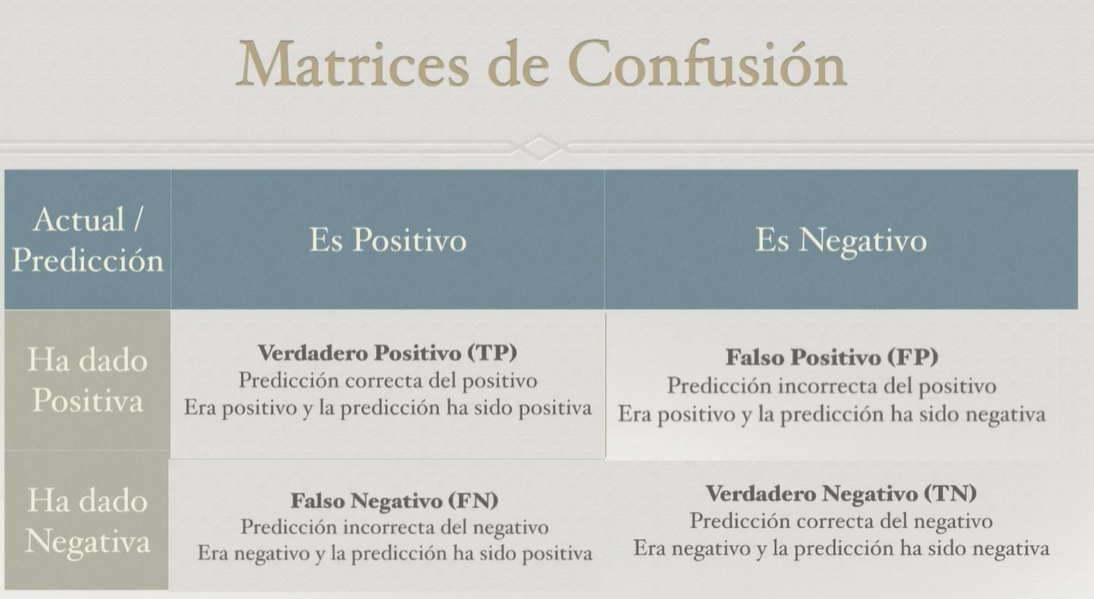

In [ ]:
# como vemos en la matriz de arriba, lo bueno es que sea Verdadero Positivo.

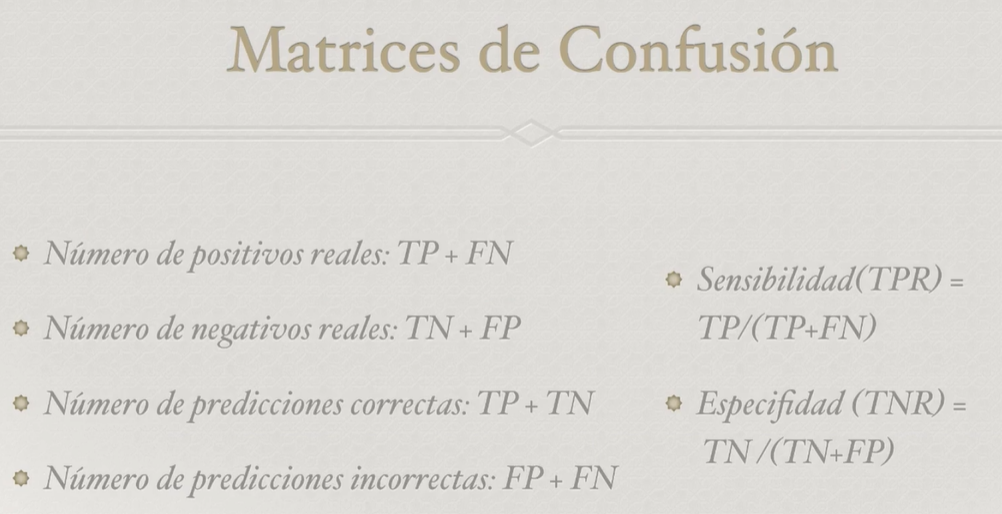

In [ ]:
# lo ideal es que un modelo fuera 100% sensible y 100% especifico. pero esto no pasa nunca. 
# para ello tenemos las curvas ROC

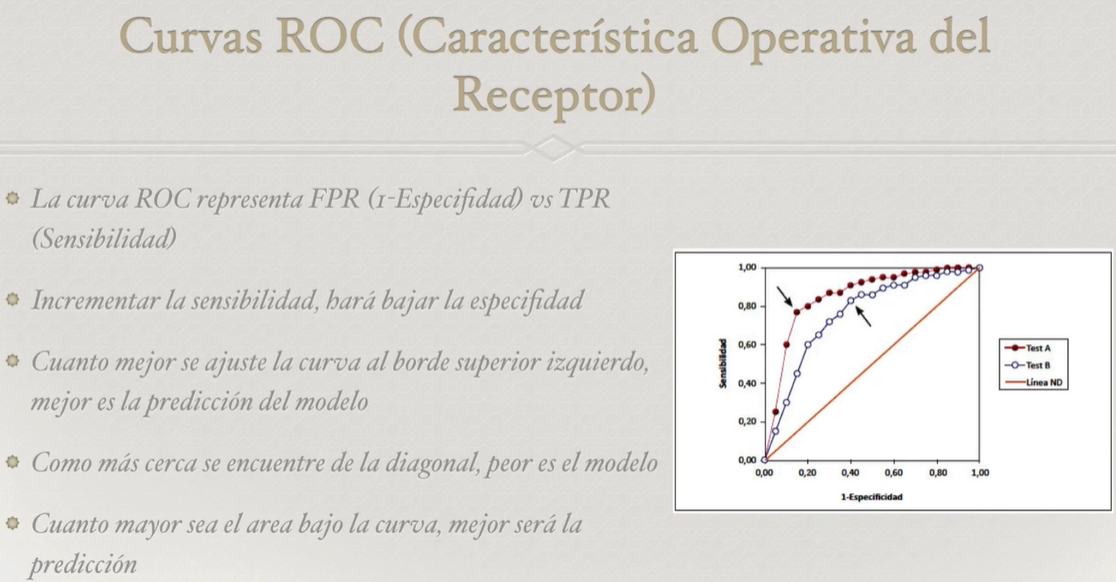

In [ ]:
# el peor modelo es que siga la linea ND, o incluso pero si está por debajo de la misma
# cuanto más alta sea la curva, mejor

In [ ]:
# para hacer una curva ROC, definimos un par de threshold y para cada uno calculamos la sensibilidad y 1-especificad y representalos para ver la curva ROC

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [182]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [183]:
probs = lm.predict_proba(X_test)

In [185]:
prob=probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df

,0,prediction,actual
0,0.055339,0,0
1,0.082816,0,0
2,0.060598,0,0
3,0.054627,0,0
4,0.102360,1,0
...,...,...,...
1231,0.054627,0,0
1232,0.040251,0,0
1233,0.341242,1,0
1234,0.021666,0,0


In [188]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,751,37
1,363,85


In [189]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]
print(TN) # true negative
print(TP) # true positive
print(FN) # false negative
print(FP) # false positive

751
85
363
37


In [190]:
sens = TP/(TP+FN)
sens

0.18973214285714285

In [191]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.04695431472081213

In [ ]:
# con esto tenemos un punto de la curva ROC. 
# podemos sacar sensibilidades y especificidades para diferentes valores de threshold
# a medida que aumento el threshold, disminuyen sensibilidad y especificidad

In [192]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [193]:
sensitivities

[1,
 0.9590163934426229,
 0.8934426229508197,
 0.7295081967213115,
 0.6967213114754098,
 0.5983606557377049,
 0.5163934426229508,
 0.45081967213114754,
 0.4426229508196721,
 0.36065573770491804,
 0.319672131147541,
 0.22950819672131148,
 0.10655737704918032,
 0]

In [194]:
especifities_1

[1,
 0.7809694793536804,
 0.718132854578097,
 0.37163375224416517,
 0.32585278276481144,
 0.17863554757630162,
 0.1337522441651705,
 0.11849192100538597,
 0.1140035906642729,
 0.08438061041292644,
 0.06912028725314179,
 0.03321364452423703,
 0.010771992818671472,
 0]

In [195]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

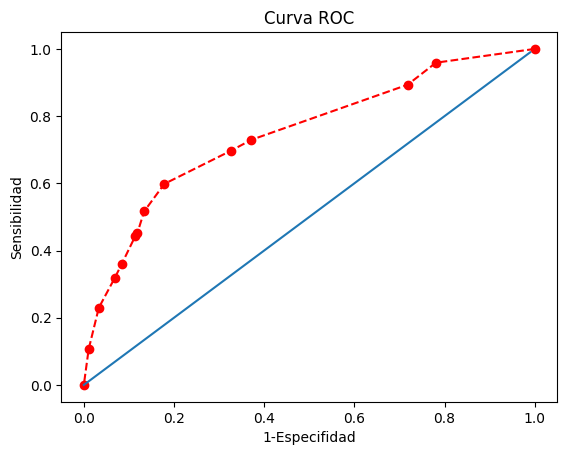

In [196]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)] #incorporo la diagonal
y=[i*0.01 for i in range(100)] #incorporo la diagonal
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [ ]:
# podría haber distintas curvas ROC. Para ver cuál sería mejor, habría que ver el area encerrada por cada curva

In [204]:
!pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.2 MB/s eta 0:00:00


In [197]:
!pip install 'plotnine[all]'
from sklearn import metrics
from pandas import Timestamp
from plotnine import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 KB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [206]:
prob

array([0.05533907, 0.08281618, 0.06059755, ..., 0.34124155, 0.02166625,
       0.51103954])

In [198]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [207]:
espc_1

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.97666068e-04,
       8.97666068e-04, 1.79533214e-03, 1.79533214e-03, 2.69299820e-03,
       5.38599641e-03, 6.28366248e-03, 7.18132855e-03, 7.18132855e-03,
       8.97666068e-03, 8.97666068e-03, 9.87432675e-03, 9.87432675e-03,
       9.87432675e-03, 1.34649910e-02, 1.52603232e-02, 1.61579892e-02,
       1.97486535e-02, 2.15439856e-02, 2.33393178e-02, 2.42369838e-02,
       2.51346499e-02, 3.14183124e-02, 3.32136445e-02, 3.32136445e-02,
       3.41113106e-02, 3.59066427e-02, 3.68043088e-02, 3.68043088e-02,
       3.94973070e-02, 4.30879713e-02, 4.48833034e-02, 4.48833034e-02,
       4.75763016e-02, 4.93716338e-02, 4.93716338e-02, 5.02692998e-02,
       5.11669659e-02, 5.29622980e-02, 5.47576302e-02, 5.56552962e-02,
       5.74506284e-02, 5.74506284e-02, 6.01436266e-02, 6.01436266e-02,
       6.37342908e-02, 6.46319569e-02, 6.55296230e-02, 6.55296230e-02,
       6.91202873e-02, 7.00179533e-02, 7.18132855e-02, 7.18132855e-02,
      

In [208]:
sensit

array([0.        , 0.00819672, 0.03278689, 0.03278689, 0.04098361,
       0.04098361, 0.04918033, 0.04918033, 0.05737705, 0.06557377,
       0.06557377, 0.07377049, 0.07377049, 0.08196721, 0.08196721,
       0.09016393, 0.10655738, 0.10655738, 0.10655738, 0.13114754,
       0.13934426, 0.13934426, 0.13934426, 0.13934426, 0.14754098,
       0.22131148, 0.22131148, 0.2295082 , 0.2295082 , 0.2295082 ,
       0.23770492, 0.24590164, 0.24590164, 0.24590164, 0.24590164,
       0.25409836, 0.25409836, 0.25409836, 0.26229508, 0.26229508,
       0.2704918 , 0.2704918 , 0.2704918 , 0.2704918 , 0.27868852,
       0.28688525, 0.28688525, 0.29508197, 0.30327869, 0.31147541,
       0.31147541, 0.31967213, 0.31967213, 0.31967213, 0.31967213,
       0.32786885, 0.32786885, 0.33606557, 0.35245902, 0.35245902,
       0.35245902, 0.36065574, 0.36065574, 0.36885246, 0.36885246,
       0.37704918, 0.37704918, 0.37704918, 0.3852459 , 0.40983607,
       0.41803279, 0.41803279, 0.43442623, 0.44262295, 0.45081

In [199]:
df = pd.DataFrame({
    "esp":espc_1,
    "sens":sensit
})

In [200]:
df.head()

,esp,sens
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.032787
3,0.000898,0.032787
4,0.000898,0.040984


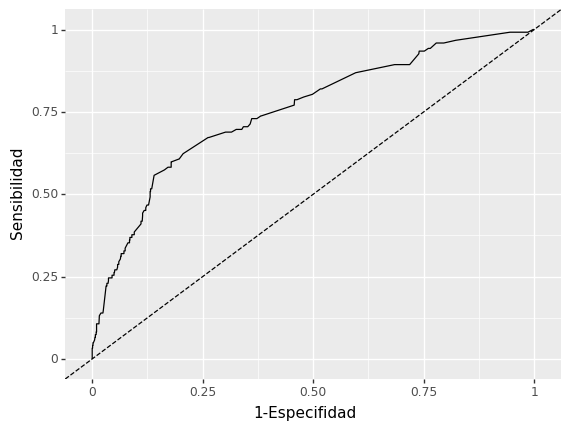

<ggplot: (8776736487406)>

In [201]:
ggplot(df, aes(x="esp", y="sens")) +geom_line() + geom_abline(linetype="dashed")+xlim(-0.01,1.01)+ylim(-0.01,1.01)+xlab("1-Especifidad")+ylab("Sensibilidad")

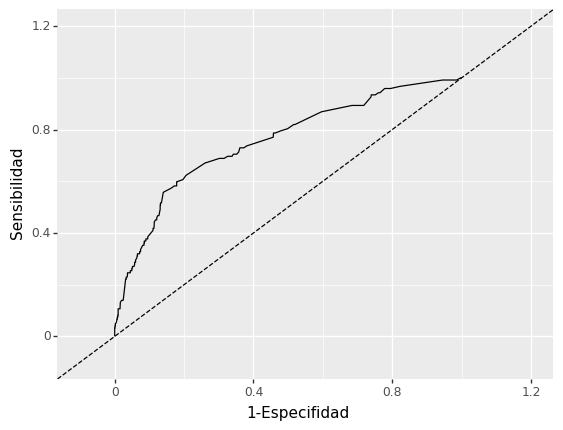

<ggplot: (8776736247342)>

In [214]:
ggplot(df, aes(x="esp", y="sens")) +geom_line() + geom_abline(linetype="dashed")+xlim(-0.1,1.2)+ylim(-0.1,1.2)+xlab("1-Especifidad")+ylab("Sensibilidad")

In [ ]:
# calculamos el area (area under curve : auc)

In [215]:
auc = metrics.auc(espc_1, sensit)
auc

0.7541093975336256

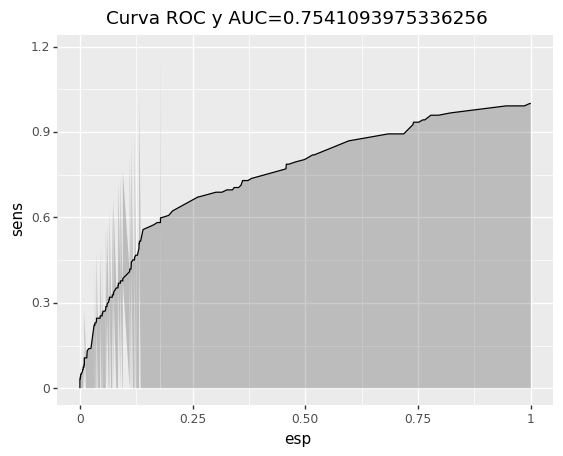

<ggplot: (8776736092552)>

In [218]:
ggplot(df, aes(x="esp", y="sens")) + geom_area(alpha=0.25)+geom_line(aes(y="sens"))+ggtitle("Curva ROC y AUC=%s"%str(auc))

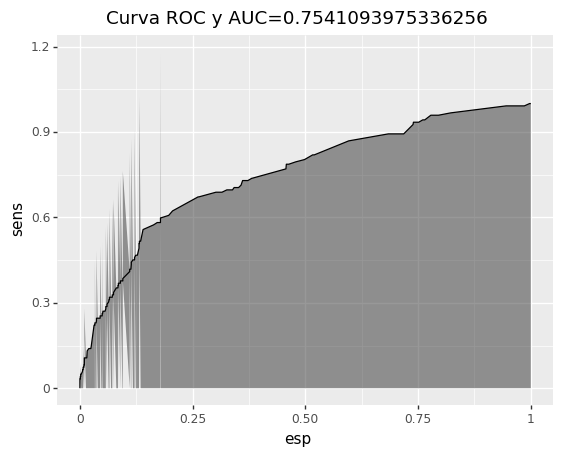

<ggplot: (8776736063735)>

In [219]:
ggplot(df, aes(x="esp", y="sens")) + geom_area(alpha=0.5)+geom_line(aes(y="sens"))+ggtitle("Curva ROC y AUC=%s"%str(auc))

In [ ]:
#### otra manera de sacar la curva:

In [220]:
from sklearn import metrics
from pandas import Timestamp
import plotnine as p9

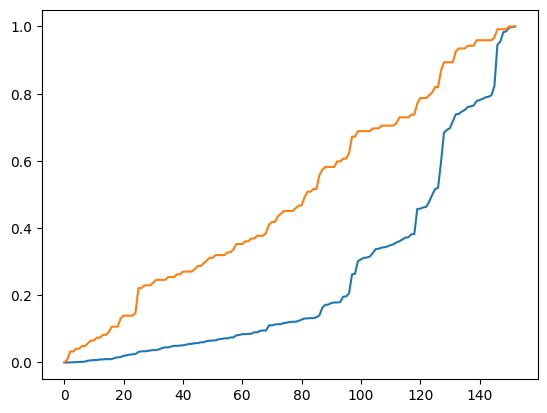

In [221]:
# seguimos con las instrucciones tal cual
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame({
"esp":espc_1,
"sens":sensit
})
df.head()
plt.plot(df, )

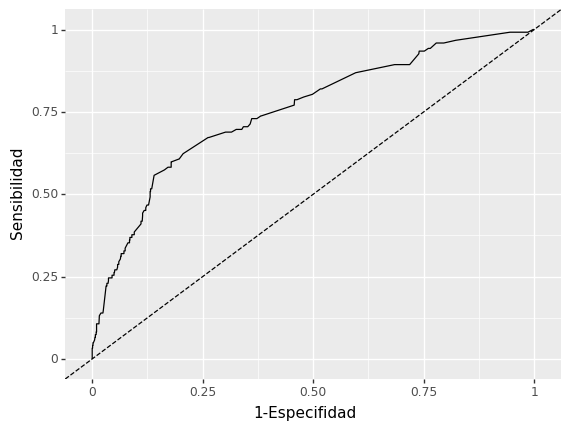

<ggplot: (8776736059076)>

In [222]:
# ahora uso de ggplot con plotnine: observar que solo hay que ponerle delante el alias p9
p9.ggplot(df, p9.aes(x="esp", y="sens")) +p9.geom_line() + p9.geom_abline(linetype="dashed")+p9.xlim(-0.01,1.01)+p9.ylim(-0.01,1.01)+p9.xlab("1-Especifidad")+p9.ylab("Sensibilidad")

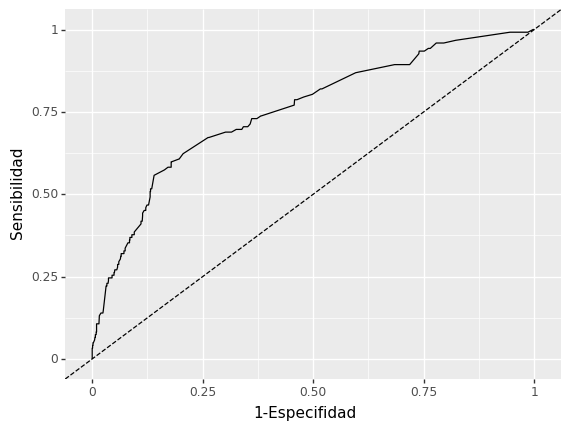

<ggplot: (8776736059049)>

In [223]:
# segunda gráfica
p9.ggplot(df, p9.aes(x="esp", y="sens")) + p9.geom_line() + p9.geom_abline(linetype="dashed")+p9.xlim(-0.01,1.01)+p9.ylim(-0.01,1.01)+p9.xlab("1-Especifidad")+p9.ylab("Sensibilidad")

In [224]:
auc = metrics.auc(espc_1, sensit)

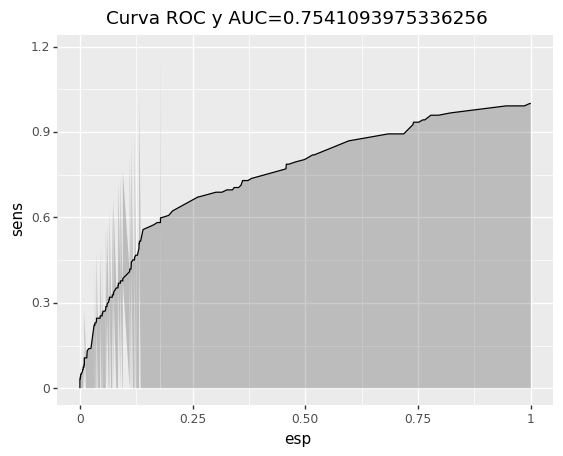

<ggplot: (8776735959562)>

In [225]:
# tercera grafica con área de la curva de roc
p9.ggplot(df, p9.aes(x="esp", y="sens")) + p9.geom_area(alpha=0.25)+p9.geom_line(p9.aes(y="sens"))+p9.ggtitle("Curva ROC y AUC=%s"%str(auc))